# TSLA Stock Price Predictions 

In [1]:
# Make necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV, check head
tes = pd.read_csv('../datasets/TSLA.csv')
tes.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
1,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
3,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
4,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600


In [3]:
# Use the .describe() method to look at a statistical breakdown of all historical TSLA prices
tes.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03
mean,225.695915,230.311998,220.891872,225.752398,225.752398,6.147241e+06
std,216.976330,223.015979,210.379066,216.822961,216.822961,5.739502e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,35.277499,36.000000,34.750000,35.312500,35.312500,2.063150e+06
50%,219.614998,222.449997,215.439995,219.075004,219.075004,4.828800e+06
75%,288.987495,296.252510,283.849998,290.314995,290.314995,7.947750e+06
max,1678.949951,1794.989990,1626.640015,1650.709961,1650.709961,6.093880e+07


In [4]:
# Check data types. One thing that can be seen here is that the column 'Date' has to be changed to a datetime
#/n datatype from an object datatype

tes.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
# Change 'Date' column to a datetime datatype

tes['Date'] = pd.to_datetime(tes['Date'])

# Check work
tes.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**In order for this model to work, we need to make sure that every value in the `Date` column is unique before turning it to the `index` of the dataframe.**

In [6]:
# Number of unique values in the Date column
tes['Date'].nunique()

2548

In [7]:
# Check the shape of the dataframe
tes.shape

# Success! We have a match

(2548, 7)

In [8]:
# Now that we know that every value in the Date column is unique, we can set it as the dataframe's index
tes.set_index('Date', inplace = True)

**Sort the Index**

It's likely that the index is already sorted chronologically when this CSV was pulled from Yahoo! Finance. However, it's important to double check this, as a time-series model will only work if these values are properly sorted. 

In [9]:
tes.sort_index(inplace = True)
tes.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100
2010-07-14,17.940001,20.150000,17.760000,19.840000,19.840000,4195200
2010-07-15,19.940001,21.500000,19.000000,19.889999,19.889999,3739800


In [10]:
for i in range(2010, 2021):
    print(i)
    print()
    print(tes[str(i)].describe())
    print()
    print()

2010

             Open        High         Low       Close   Adj Close  \
count  127.000000  127.000000  127.000000  127.000000  127.000000   
mean    23.411417   24.005512   22.699842   23.344567   23.344567   
std      5.113275    5.300281    4.907919    5.139795    5.139795   
min     16.139999   16.629999   14.980000   15.800000   15.800000   
25%     20.200001   20.665000   19.705000   20.149999   20.149999   
50%     20.980000   21.350000   20.510000   20.920000   20.920000   
75%     27.365001   28.295000   26.439999   27.180000   27.180000   
max     35.869999   36.419998   34.750000   35.470001   35.470001   

             Volume  
count  1.270000e+02  
mean   1.269267e+06  
std    1.512952e+06  
min    1.185000e+05  
25%    4.227500e+05  
50%    7.419000e+05  
75%    1.382750e+06  
max    9.301900e+06  


2011

             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    26.821984   27.38023

**We can also use the `resample` technique to look at the average values in the table by `Year` and `Month` quite easily**

In [11]:
tes.resample('Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,23.411417,24.005512,22.699842,23.344567,23.344567,1.269267e+06
2011-12-31,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06
2012-12-31,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06
2013-12-31,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06
2014-12-31,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06
2015-12-31,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06
2016-12-31,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06
2017-12-31,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06
2018-12-31,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06


In [12]:
tes.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-31,19.827000,20.376000,18.743500,19.438000,19.438000,2.817850e+06
2010-08-31,19.545455,19.910000,19.080455,19.510909,19.510909,6.835545e+05
2010-09-30,20.779048,21.276190,20.309048,20.740476,20.740476,8.593286e+05
2010-10-31,20.723333,20.992857,20.425714,20.713333,20.713333,3.118000e+05
2010-11-30,28.587143,29.870000,27.728571,29.041905,29.041905,1.348338e+06
...,...,...,...,...,...,...
2020-04-30,665.294761,686.601908,641.063809,663.598576,663.598576,1.816622e+07
2020-05-31,799.060001,815.735999,780.345499,799.425497,799.425497,1.363895e+07
2020-06-30,958.193642,980.865906,938.670000,963.542278,963.542278,1.162355e+07


### EDA and Data Visualization

Below is a graph comparing the monthly average TSLA stock price to the annual average TSLA stock price

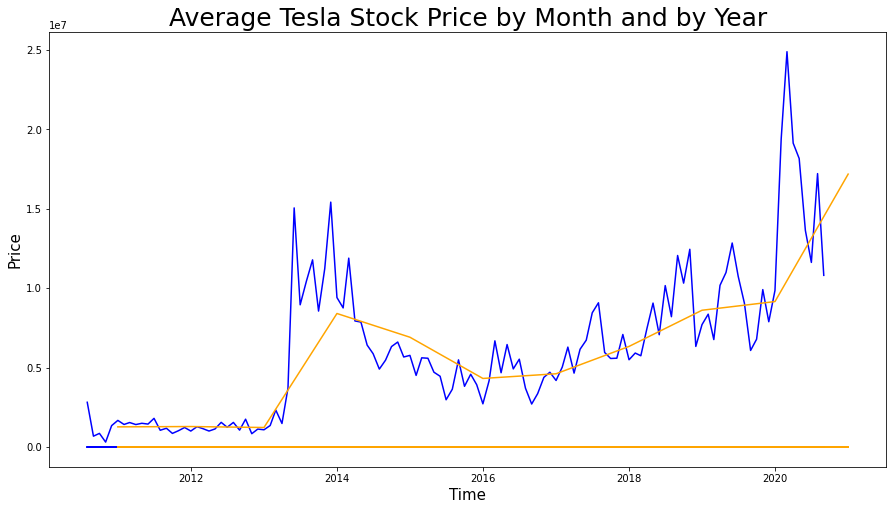

In [13]:
plt.figure(figsize = (15, 8))
plt.plot(tes.resample('M').mean(), color = 'blue')
plt.plot(tes.resample('Y').mean(), color = 'orange')
plt.title('Average Tesla Stock Price by Month and by Year', size = 25)
plt.xlabel('Time', size = 15)
plt.ylabel('Price', size = 15);

Below is a graph comparing the TSLA open stock price to the 30 day rolling average of the TSLA stock price.

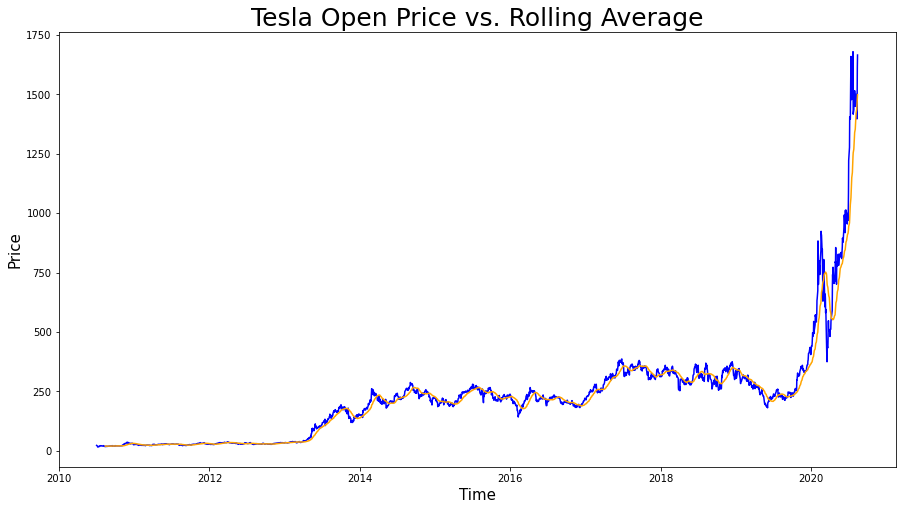

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(tes['Open'], color = 'blue')
plt.plot(tes['Open'].rolling(30).mean(), color = 'orange')
plt.title('Tesla Open Price vs. Rolling Average', size = 25)
plt.xlabel('Time', size = 15)
plt.ylabel('Price', size = 15);

**Look for stationarity**

As seen in the above graph, TSLA's stock price is not stationary -- like most stock prices, it has significantly changed over time and doesn't have a consistent mean. In the graphs below (most notably the bottom 2 graphs), we can remove seasonality trend from the data and achieve stationarity by using `.diff()` and `.pct_change()` methods.

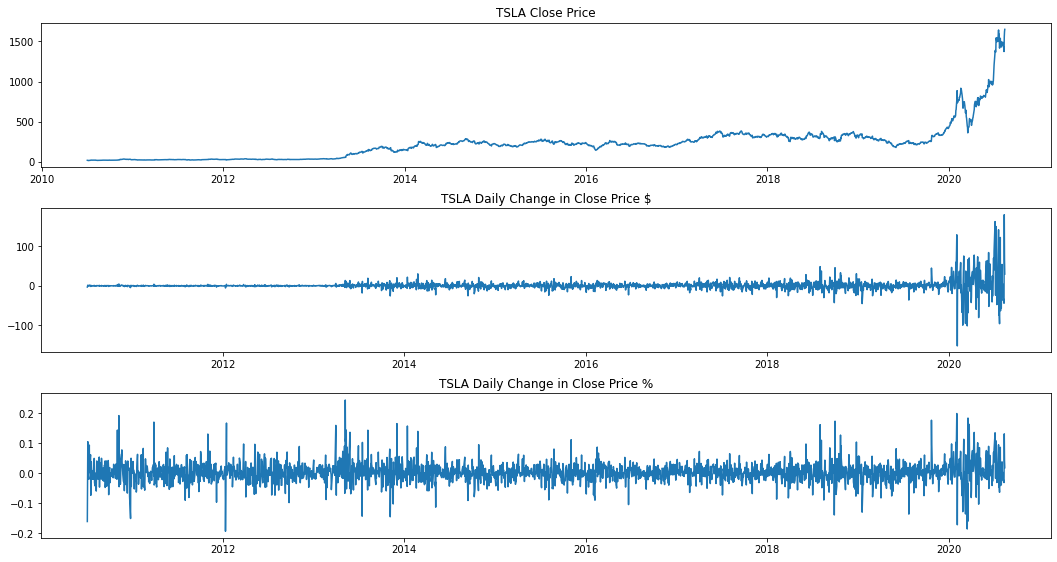

In [15]:
# Instantiate a figure and the 3 subplots
fig, axes = plt.subplots(nrows = 3,
                         figsize = (15, 8))

# Create spacing between the 2 subplots
fig.tight_layout(pad = 2)

# Create the 3 subplots
axes[0].plot(tes['Close'])
axes[1].plot(tes['Close'].diff())
axes[2].plot(tes['Close'].pct_change())

# Title the 3 subplots
axes[0].title.set_text('TSLA Close Price')
axes[1].title.set_text('TSLA Daily Change in Close Price $')
axes[2].title.set_text('TSLA Daily Change in Close Price %');

**Autocorrelation**

In the cell below, I've created 3 new columns in the dataframe: `Close_lag_1`, `Close_lag_2`, and `Close_lag_3`. These columns are created by using the `.shift()` method on the column `'Close'` 3 different times. This allows us to `autocorrelate` the `Close` values with themselves on a 1, 2, and 3 day difference. In Time Series Models, it's common to correlate a series of values with itself. The question that's essentially being asked here is: Is Tesla's stock price a good predictor of itself in the future?

In [16]:
tes['Close_lag_1'] = tes['Close'].shift(1)
tes['Close_lag_2'] = tes['Close'].shift(2)
tes['Close_lag_3'] = tes['Close'].shift(3)
tes.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3
Date,,,,,,,,,
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN,NaN,NaN
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,19.200001,NaN,NaN
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,16.110001,19.200001,NaN
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,15.800000,16.110001,19.200001
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,17.459999,15.800000,16.110001


In [17]:
# A look at how well the 3 lagged values correlate with the Close value
tes[['Close', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3']].corr()

,Close,Close_lag_1,Close_lag_2,Close_lag_3
Close,1.000000,0.997992,0.996028,0.994033
Close_lag_1,0.997992,1.000000,0.997959,0.995986
Close_lag_2,0.996028,0.997959,1.000000,0.997940
Close_lag_3,0.994033,0.995986,0.997940,1.000000


In [18]:
# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf

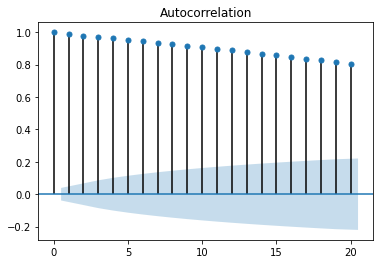

In [19]:
# Generate the ACF plot on Close data for 20 time lags
plot_acf(tes['Close'], lags = 20);

In order to use the lagged variables and not overfit the model with this data, we can import the `partial autocorrelation function`.

In [20]:
# Import the partial autocorrelation function (PACF) plot.
from statsmodels.graphics.tsaplots import plot_pacf

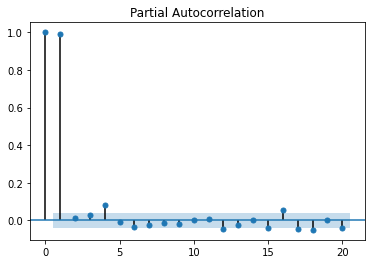

In [22]:
plot_pacf(tes['Close'], lags = 20);

**In the above graph**, the blue area close to the horizontal axis represents a 95% confidence interval. The measure of any variable along the vertical axis that exceeds the blue portion of the graph represents statistically significance in that variable.

Let's look at the same graph with a lag of 50 days:

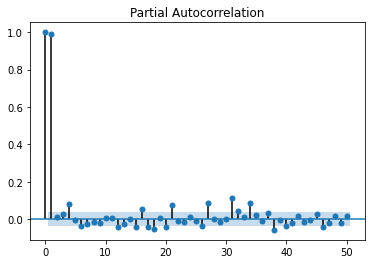

In [26]:
plot_pacf(tes['Close'], lags = 50);

As we can see in this graph, there are lagged `Close` values beyond the 20 day lag that are statistically significant.

**Next**, we will take the original `tes` dataframe with the columns `Open`, `Close`, `Low`, `Adj Close`, and `Volume` and create lag columns for the variable `Close` that are statistically significant according to the partial autocorrelation plot above.

In [29]:
tes.drop(columns = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3'], inplace = True)
tes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600


In [33]:
# Create the Close_lag_1 column
tes['Close_lag_1'] = tes['Close'].shift(1)

# Create the Close_lag_4 column
tes['Close_lag_4'] = tes['Close'].shift(4)

# Create the Close_lag_1 column
tes['Close_lag_16'] = tes['Close'].shift(16)

# Create the Close_lag_17 column
tes['Close_lag_17'] = tes['Close'].shift(17)

# Create the Close_lag_18 column
tes['Close_lag_18'] = tes['Close'].shift(18)

# Create the Close_lag_20 column
tes['Close_lag_20'] = tes['Close'].shift(20)

# Create the Close_lag_21 column
tes['Close_lag_21'] = tes['Close'].shift(21)

# Create the Close_lag_26 column
tes['Close_lag_26'] = tes['Close'].shift(26)

# Create the Close_lag_27 column
tes['Close_lag_27'] = tes['Close'].shift(27)

# Create the Close_lag_31 column
tes['Close_lag_31'] = tes['Close'].shift(31)

# Create the Close_lag_32 column
tes['Close_lag_32'] = tes['Close'].shift(32)

# Create the Close_lag_34 column
tes['Close_lag_34'] = tes['Close'].shift(34)

# Create the Close_lag_38 column
tes['Close_lag_38'] = tes['Close'].shift(38)

# Create the Close_lag_40 column
tes['Close_lag_40'] = tes['Close'].shift(40)

# Create the Close_lag_46 column
tes['Close_lag_46'] = tes['Close'].shift(46)

In [34]:
# Check work and make sure all columns have been created correctly
tes.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close_lag_1',
       'Close_lag_16', 'Close_lag_4', 'Close_lag_17', 'Close_lag_18',
       'Close_lag_20', 'Close_lag_21', 'Close_lag_26', 'Close_lag_27',
       'Close_lag_31', 'Close_lag_32', 'Close_lag_34', 'Close_lag_38',
       'Close_lag_40', 'Close_lag_46'],
      dtype='object')

### Model creation

Now it's time to create the linear timne series model and check to see how accurately we can forecast TSLA stock prices. Doing this will require importing several different libraries, and doing a `train-test-split` to see how effectvie the model is.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(tes.drop(columns = ['Close']),
                                                    tes['Close'],
                                                    test_size = 0.2,
                                                    shuffle = False)

# Setting shuffle = False means that we'll keep the chronological order of the timeseries model

In [37]:
# Check shape to confirm we did the train-test-split properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2038, 20)
(510, 20)
(2038,)
(510,)


**Fitting a linear model**

In [38]:
# Import statsmodels.
import statsmodels.api as sm

In [39]:
# Before fitting a model in statsmodels, we need to manually add a y-intercept to X_train and X_test

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

,const,Open,High,Low,Adj Close,Volume,Close_lag_1,Close_lag_16,Close_lag_4,Close_lag_17,...,Close_lag_20,Close_lag_21,Close_lag_26,Close_lag_27,Close_lag_31,Close_lag_32,Close_lag_34,Close_lag_38,Close_lag_40,Close_lag_46
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-02,1.0,23.000000,23.100000,18.709999,19.200001,5139800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.0,20.000000,20.000000,15.830000,16.110001,6866900,19.200001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,1.0,16.400000,16.629999,14.980000,15.800000,6921700,16.110001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,1.0,16.139999,17.520000,15.570000,17.459999,7711400,15.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-09,1.0,17.580000,17.900000,16.549999,17.400000,4050600,17.459999,NaN,19.200001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The new y-intercept value shows up in `X_train` and `X_test` as the column `const`


In [40]:
# statsmodels won't be able to handle NaNs.

X_train.dropna(inplace = True)
y_train = y_train[X_train.index]

# This way we subset y_train to keep only indices from X_train after dropping NaNs.

In [41]:
# Instantiate the model
lm = sm.OLS(y_train, X_train)

In [42]:
# Fit the model
lm_results = lm.fit()

In [43]:
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.818e+24
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:12:48   Log-Likelihood:                 38840.
No. Observations:                1992   AIC:                        -7.764e+04
Df Residuals:                    1971   BIC:                        -7.752e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.521e-13   3.51e-11      0.004   

In [45]:
lm_results.predict(X_test)

Date
2018-08-07     379.570007
2018-08-08     370.339996
2018-08-09     352.450012
2018-08-10     355.489990
2018-08-13     356.410004
                 ...     
2020-08-10    1418.569946
2020-08-11    1374.390015
2020-08-12    1554.760010
2020-08-13    1621.000000
2020-08-14    1650.709961
Length: 510, dtype: float64

In [46]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
# Calculate R2 score.
r2_score(y_test, lm_results.predict(X_test))

1.0

In [48]:
# Calculate RMSE.
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

1.7542805036449271e-09

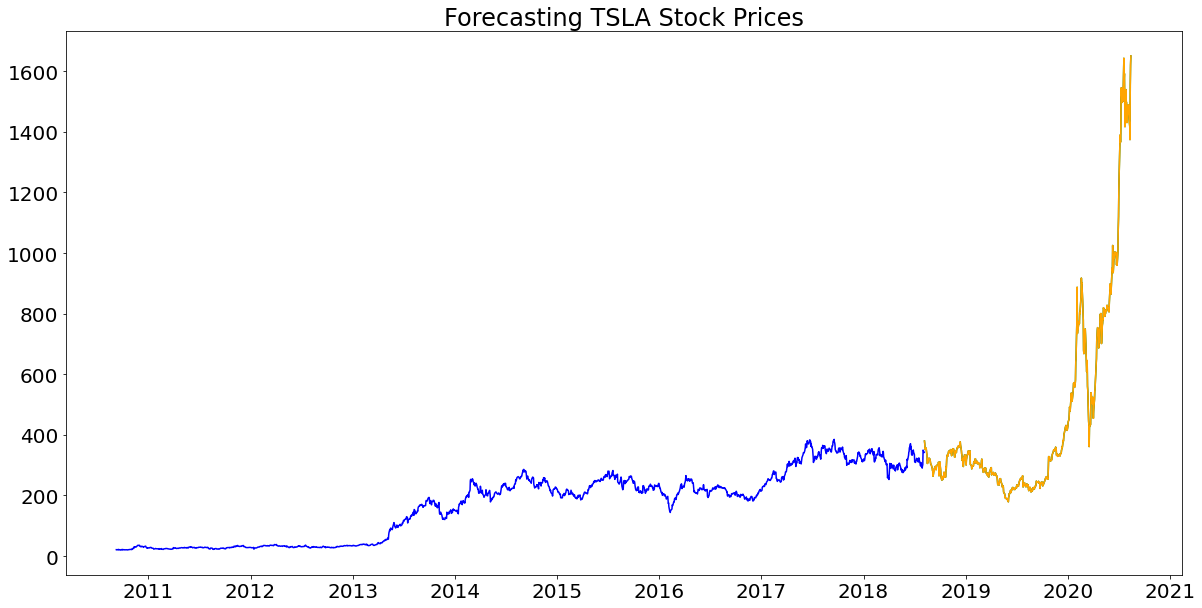

In [51]:
# Let's plot our predictions:

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'green')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'orange')

# Set label.
plt.title(label = 'Forecasting TSLA Stock Prices', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

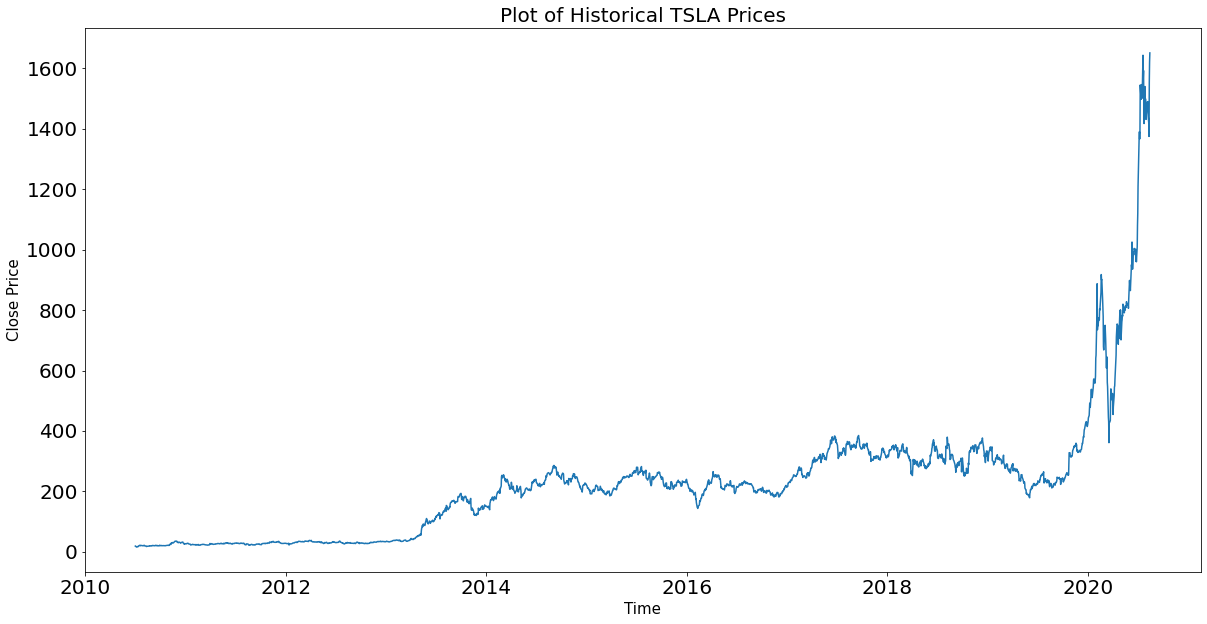

In [56]:
# Let's compare to the actual stock chart:

# Set figure size.
plt.figure(figsize=(20,10))
plt.plot(tes['Close'])
plt.title('Plot of Historical TSLA Prices', size = 20)
plt.xlabel('Time', size = 15)
plt.ylabel('Close Price', size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20);